In [ ]:
# PREDICT THE BURNED AREA OF FOREST FIRES WITH NEURAL NETWORKS

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

In [2]:
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense,Dropout

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,KFold

In [4]:
# sorting imp features
from sklearn.feature_selection import SelectKBest,mutual_info_regression

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
import warnings
warnings.filterwarnings('ignore')

### Data Preprocessing

In [7]:
forest = pd.read_csv('forestfires.csv')

In [8]:
forest.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [9]:
# we already have dummy variables - dropping this categorical data
forest.drop(['month','day'],axis=1,inplace=True)

In [10]:
forest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FFMC           517 non-null    float64
 1   DMC            517 non-null    float64
 2   DC             517 non-null    float64
 3   ISI            517 non-null    float64
 4   temp           517 non-null    float64
 5   RH             517 non-null    int64  
 6   wind           517 non-null    float64
 7   rain           517 non-null    float64
 8   area           517 non-null    float64
 9   dayfri         517 non-null    int64  
 10  daymon         517 non-null    int64  
 11  daysat         517 non-null    int64  
 12  daysun         517 non-null    int64  
 13  daythu         517 non-null    int64  
 14  daytue         517 non-null    int64  
 15  daywed         517 non-null    int64  
 16  monthapr       517 non-null    int64  
 17  monthaug       517 non-null    int64  
 18  monthdec  

In [11]:
forest['size_category'].value_counts()

small    378
large    139
Name: size_category, dtype: int64

In [12]:
# label encoder

label_encode = LabelEncoder()

forest['size_category'] = label_encode.fit_transform(forest['size_category'])

In [13]:
forest['size_category'].value_counts()

1    378
0    139
Name: size_category, dtype: int64

In [14]:
forest['size_category'].dtype

dtype('int32')

<AxesSubplot:>

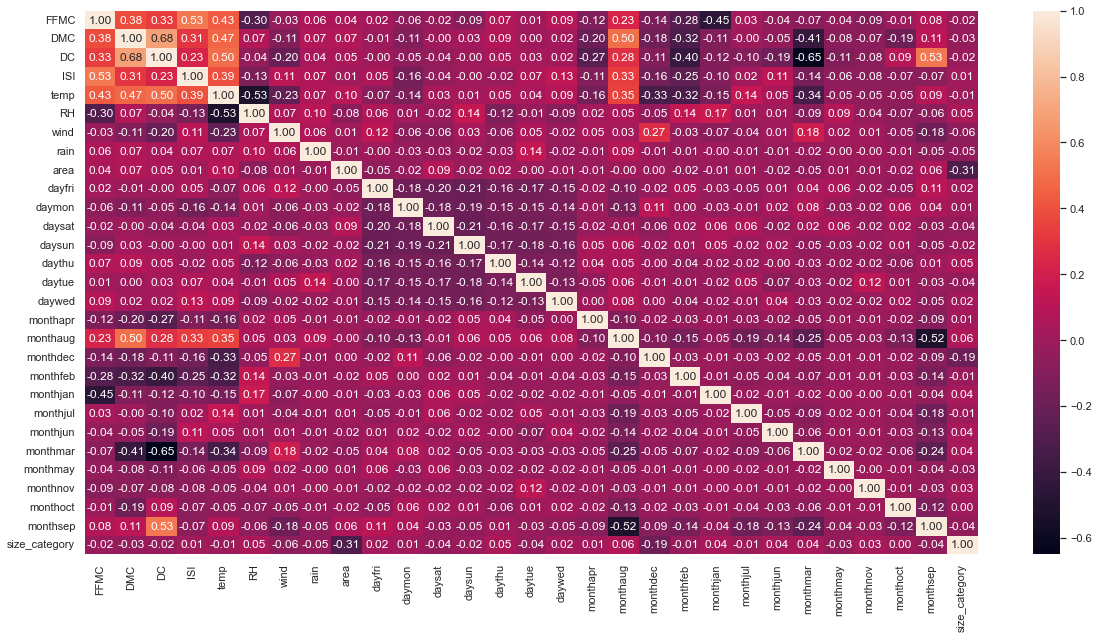

In [15]:
plt.figure(figsize=(20,10))
sns.heatmap(forest.corr(),annot=True,fmt='.2f')

In [16]:
x = forest.iloc[:,0:28]
y = forest.iloc[:,28]

In [17]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=8)

### Artificial Neural Network Model - Backpropagation

In [18]:
model = tf.keras.models.Sequential()

model.add(Dense(42,input_dim = 28,activation = 'sigmoid'))
model.add(Dense(20,activation = 'sigmoid'))
model.add(Dense(1,activation = 'sigmoid'))

model.compile(loss='binary_crossentropy',optimizer = 'adam', metrics=['accuracy'])

Hist = model.fit(X_train,y_train,validation_split=0.2,epochs=100,batch_size = 50)

Epoch 1/100
6/6 [==============================] - 1s 38ms/step - loss: 0.6893 - accuracy: 0.5625 - val_loss: 0.6537 - val_accuracy: 0.7260
Epoch 2/100
6/6 [==============================] - 0s 9ms/step - loss: 0.6387 - accuracy: 0.7014 - val_loss: 0.6085 - val_accuracy: 0.7534
Epoch 3/100
6/6 [==============================] - 0s 10ms/step - loss: 0.6124 - accuracy: 0.7222 - val_loss: 0.5836 - val_accuracy: 0.7534
Epoch 4/100
6/6 [==============================] - 0s 9ms/step - loss: 0.5977 - accuracy: 0.7222 - val_loss: 0.5714 - val_accuracy: 0.7534
Epoch 5/100
6/6 [==============================] - 0s 12ms/step - loss: 0.5904 - accuracy: 0.7222 - val_loss: 0.5656 - val_accuracy: 0.7534
Epoch 6/100
6/6 [==============================] - 0s 9ms/step - loss: 0.5868 - accuracy: 0.7222 - val_loss: 0.5624 - val_accuracy: 0.7534
Epoch 7/100
6/6 [==============================] - 0s 6ms/step - loss: 0.5834 - accuracy: 0.7222 - val_loss: 0.5642 - val_accuracy: 0.7534
Epoch 8/100
6/6 [=======

In [19]:
cal_score_train = model.evaluate(X_train,y_train)

12/12 [==============================] - 0s 726us/step - loss: 0.0848 - accuracy: 0.9917


In [20]:
print(f'Loss is {cal_score_train[0]}')
print(f'Accuracy is {cal_score_train[1]}')

Loss is 0.08479010313749313
Accuracy is 0.9916897416114807


In [21]:
cal_score_test = model.evaluate(X_test,y_test)

print(f'Loss is {cal_score_test[0]}')
print(f'Accuracy is {cal_score_test[1]}')

5/5 [==============================] - 0s 3ms/step - loss: 0.1188 - accuracy: 0.9744
Loss is 0.11876542866230011
Accuracy is 0.9743589758872986


In [22]:
Hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
# Visualization

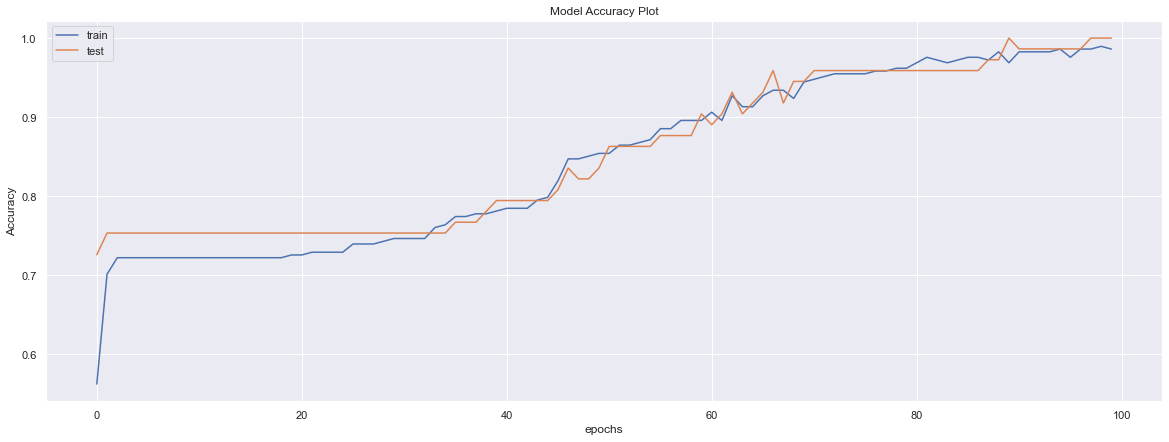

In [23]:
plt.figure(figsize =(20,7))

plt.plot(Hist.history['accuracy'])
plt.plot(Hist.history['val_accuracy'])

plt.title('Model Accuracy Plot')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='upper left')

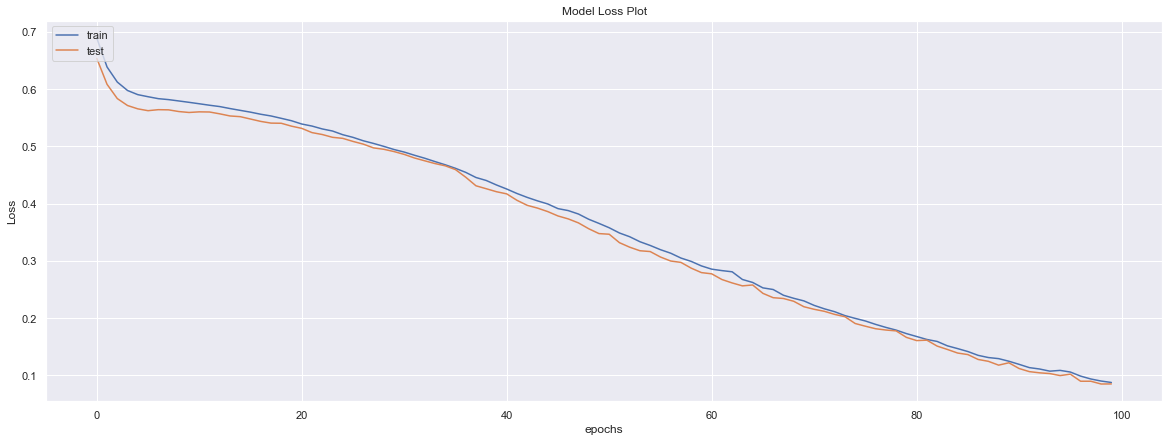

In [24]:
plt.figure(figsize =(20,7))

plt.plot(Hist.history['loss'])
plt.plot(Hist.history['val_loss'])

plt.title('Model Loss Plot')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc='upper left')

In [29]:
model.predict(X_test)

array([[0.96436596],
       [0.07280785],
       [0.06839493],
       [0.71118736],
       [0.9660752 ],
       [0.03137481],
       [0.9214475 ],
       [0.96842885],
       [0.03315321],
       [0.956548  ],
       [0.9711424 ],
       [0.40729555],
       [0.10047764],
       [0.67612547],
       [0.11443514],
       [0.9547692 ],
       [0.10150501],
       [0.04893249],
       [0.9587399 ],
       [0.935187  ],
       [0.97056186],
       [0.9292513 ],
       [0.9730127 ],
       [0.97568023],
       [0.97280765],
       [0.9627149 ],
       [0.43839455],
       [0.96871036],
       [0.9706412 ],
       [0.19147086],
       [0.9892241 ],
       [0.26560688],
       [0.9342363 ],
       [0.9812445 ],
       [0.93473375],
       [0.99262786],
       [0.20891204],
       [0.95791847],
       [0.9260752 ],
       [0.96247375],
       [0.99178904],
       [0.9731657 ],
       [0.93934226],
       [0.50025   ],
       [0.37677118],
       [0.9711388 ],
       [0.98449385],
       [0.031

### Model 2

In [25]:
model2 = tf.keras.models.Sequential()

model2.add(Dense(42,input_dim = 28,activation = 'relu'))
model2.add(Dense(20,activation = 'relu'))
model2.add(Dense(1,activation = 'sigmoid'))

model2.compile(loss='binary_crossentropy',optimizer = 'adam', metrics=['accuracy'])

Hist2 = model2.fit(X_train,y_train,validation_split=0.3,epochs=100,batch_size = 50)

Epoch 1/100
6/6 [==============================] - 0s 28ms/step - loss: 20.9886 - accuracy: 0.7302 - val_loss: 10.0597 - val_accuracy: 0.7431
Epoch 2/100
6/6 [==============================] - 0s 9ms/step - loss: 5.9156 - accuracy: 0.7024 - val_loss: 2.6494 - val_accuracy: 0.5413
Epoch 3/100
6/6 [==============================] - 0s 8ms/step - loss: 1.9500 - accuracy: 0.5675 - val_loss: 1.6106 - val_accuracy: 0.7615
Epoch 4/100
6/6 [==============================] - 0s 5ms/step - loss: 2.2222 - accuracy: 0.7500 - val_loss: 1.1822 - val_accuracy: 0.7615
Epoch 5/100
6/6 [==============================] - 0s 6ms/step - loss: 1.3367 - accuracy: 0.7143 - val_loss: 1.0846 - val_accuracy: 0.7156
Epoch 6/100
6/6 [==============================] - 0s 5ms/step - loss: 1.1410 - accuracy: 0.7024 - val_loss: 0.8694 - val_accuracy: 0.8257
Epoch 7/100
6/6 [==============================] - 0s 6ms/step - loss: 1.2185 - accuracy: 0.7579 - val_loss: 1.2004 - val_accuracy: 0.6239
Epoch 8/100
6/6 [=======

In [26]:
cal_score_relu_train = model2.evaluate(X_train,y_train)

12/12 [==============================] - 0s 0s/step - loss: 0.1192 - accuracy: 0.9751


In [27]:
print(f'Loss is {cal_score_relu_train[0]}')
print(f'Accuracy is {cal_score_relu_train[1]}')

Loss is 0.11918696016073227
Accuracy is 0.9750692248344421


In [28]:
cal_score_relu_test = model2.evaluate(X_test,y_test)

print(f'Loss is {cal_score_relu_test[0]}')
print(f'Accuracy is {cal_score_relu_test[1]}')

5/5 [==============================] - 0s 2ms/step - loss: 0.1805 - accuracy: 0.9295
Loss is 0.18052098155021667
Accuracy is 0.9294871687889099


In [ ]:
# since the data in more linear hence Sigmoid has better accuracy than relu